## Iris sepal length vs. petal length

### The question

<div>
<img src="attachment:51518iris img1.png" width='50%' title=""/>
</div>

In this dataset of sepal and petal sizes of three species of irises we want to test two hypotheses at the same time.
1. That iris sepal length and petal length are related
2. and, if so, how does that relatedness vary between iris species.

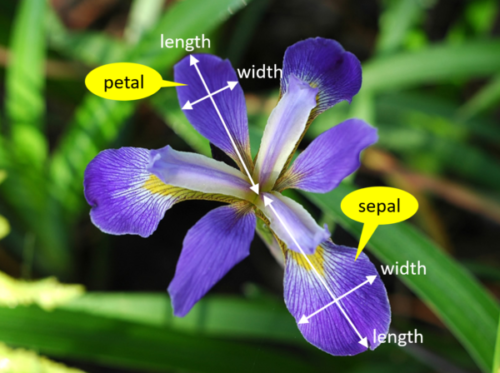

We need to be careful when performing this type of, what's called, "post-hoc analysis". It's very easy to find significant relationships that aren't actually there. To prevent this from happening we must compare our complex models with simpler models to see which explain the data well with the fewest possible terms.

### Imports

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

### Load and print the data

First we read in the dataset and print it to see how it looks and what the variable names, types and values are.

In [2]:
iris = pd.read_csv('../Datasets/iris.csv')
iris

sepal_length  sepal_width  petal_length  petal_width     Species  \
0             5.0          2.0           3.5          1.0  versicolor   
1             6.0          2.2           5.0          1.5   virginica   
2             5.5          2.3           4.0          1.3  versicolor   
3             5.0          2.3           3.3          1.0  versicolor   
4             5.5          2.4           3.8          1.1  versicolor   
..            ...          ...           ...          ...         ...   
145           5.1          3.8           1.5          0.3      setosa   
146           5.1          3.8           1.9          0.4      setosa   
147           7.9          3.8           6.4          2.0   virginica   
148           5.8          4.0           1.2          0.2      setosa   
149           5.7          4.4           1.5          0.4      setosa   

         Site  
0       Field  
1       Field  
2       Field  
3       Field  
4       Field  
..        ...  
145  Roadside  
146  Roadside  
147  Roadside  
148  Roadside  
149  Roadside  

[150 rows x 6 columns]

There are six variables. The first four, "sepal_length", "sepal_width", "petal_length" and "petal_width", are continuous numerical. The last two, "Species" and "Site" are categorical. The code below prints out the levels (the unique values) of "Species" and "Site".

There are three species: versicolor, virginica and setosa. And there are three types of site: field, marsh and roadside.

In [3]:
print(iris['Species'].unique())
print(iris['Site'].unique())

['versicolor' 'virginica' 'setosa']
['Field' 'Marsh' 'Roadside']


For the iris data set we want to examine the relationship between sepal length and petal length - two numerical variables, and also examine how this relationship may vary between species - a categorical variable.

First let's plot the data to see what it looks like.

### Plot the data

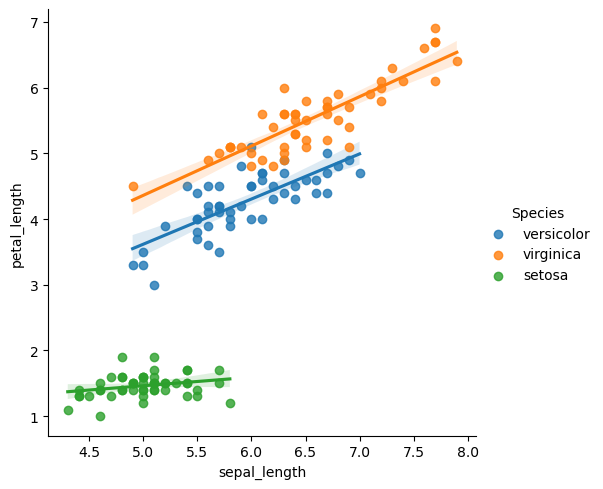

In [4]:
sns.lmplot(x='sepal_length', y='petal_length', hue='Species', data=iris);

For versicolor and virginica there is a clear linear relationship between sepal and petal lengths: as one increases so does the other. The relationship for setosa is not so clear, and there may be no relationship at all. 

In the above plot there are three straight lines. Each line has a *y*-intercept and a slope. So there are six parameters to estimate in total. Some of these parameters may not be significantly different from each other. For example, it looks like the slopes for versicolor and virginica may be the same, whereas the slope for setosa is much smaller than for the other two species, and may even be zero. 

To estimate and test these parameters we need a model:

    petal_length ~ Species + sepal_length + sepal_length:Species

There are two main effects: "Species" and "sepal_length", and an interaction term "sepal_length:Species".

Before we fit and interpret the model let's remind ourselves that the default reference level of "Intercept" is the level that is alphabetically first. So "setosa" is the reference level.

### Code and fit the model

In [5]:
formula = 'petal_length ~ Species + sepal_length + sepal_length:Species'
fit = ols(formula, iris).fit()
fit.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Interpret the summary of the model fit

The first row shows the estimate of `Intercept`, that is the *y*-axis intercept of the petal length of setosa (the reference level). In other words, the estimated petal length of setosa when sepal length is zero. It's estimate is 0.81 mm, but notice that its *p*-value is 0.13, i.e., greater than 0.05, and therefore not significantly different from zero. Its 95% CI also contains zero.  

The second row `Species[T.versicolor]`, is the difference between the *y*-intercept of versicolor and the *y*-intercept of setosa. It's value os -0.63 mm, but it is not significantly different from zero as *p* = 0.36.

The same is also true of `Species[T.virginica]`. So it looks as if the *y*-intercept of all three straight lines probably pass through the origin. We'll test that further in a moment when we simplify the model.

The fourth row `sepal_length`, is the slope of the line of setosa (the reference level). Its value is 0.13, but it is not significantly different from zero. This is what we suspected when we looked at the scatterplot.

The fifth row `sepal_length:Species[T.versicolor]` is the difference in the slope between versicolor and setosa. It is significantly different from zero as we expected from the scatterplot. 

The same is also true for the sixth row `sepal_length:Species[T.virginica]`.

### Model simplification


All three *y*-intercepts are not significantly different from zero, so we should test a simpler model with those removed. You might first think that removing "Species" from the model like so

    petal_length ~ sepal_length + sepal_length:Species
    
removes the three intercepts. But due to a quirk of how statistical model formulae are written, this does not remove the `Intercept` term which is the *y*-intercept of "setosa". The code below shows that this is the case

In [6]:
formula = 'petal_length ~ sepal_length + sepal_length:Species'
fit2 = ols(formula, iris).fit()
fit2.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

The `Intercept` of 0.5094 is the *y*-axis intercept of setosa.

Instead we need to explicitly remove `Intercept` by including `-1` in the model formula like so

    petal_length ~ sepal_length + sepal_length:Species - 1

This doesn't mean substract 1, it means remove `Intercept` from the model. Remember, model formula are not quite the same as mathematical formula; they are representations of mathematical formula used to simplify the process of statistical modelling.

Let's try fitting this model

In [7]:
formula = 'petal_length ~ sepal_length + sepal_length:Species - 1'
fit2 = ols(formula, iris).fit()
fit2.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

This gives us the slope of "setosa" as 0.2917. What about the slopes of versicolor and verginica? Remember that `ols` estimates the difference relative to the reference level. So the slope of versicolor is actually 0.2917 + 0.4258 = 0.7175, and the slope of virginica is 0.2917 + 0.5502 = 0.8419.

Wouldn't it be better if we got `ols` to estimate the actual slopes rather than the difference in slopes relative to the reference level? Yes. And it can be done with this model

    petal_length ~ sepal_length:Species - 1

That is, we just have the interaction effect and no main effects, including the `Intercept`. Let's try fitting this model

In [8]:
formula = 'petal_length ~ sepal_length:Species - 1'
fit2 = ols(formula, iris).fit()
fit2.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

That's better, we now have estimates of all three slopes. And they are all significant.

### Model comparison

We should also do a comparison of our first model and our simplified model to make sure that simplification hasn't made us throw out an interesting result.

In [10]:
print(fit.aic, fit2.aic)

28.719498366615028 27.845171100438563


The AIC of the simpler model (fit2) is smaller, therefore it is our preferred model.

### Report the outcome

Mean petal length and mean sepal length of iris species are significantly and positively related. For setosa the slope of the relationship is 0.29 (95% CI [0.27, 0.31]). For versicolor the slope of the relationship is 0.72 (95% CI [0.71, 0.73]). For virginica the slope of the relationship is 0.84 (95% CI [0.83, 0.85]).